In [40]:
!pip install pandas


[notice] A new release of pip available: 22.2.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
!pip install numpy



[notice] A new release of pip available: 22.2.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
!pip install Matplotlib


[notice] A new release of pip available: 22.2.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
!pip install Scikit-learn


[notice] A new release of pip available: 22.2.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [58]:
url = "https://raw.githubusercontent.com/Kapitalino/Man_Industrial/main/predictive-maintenance-dataset.csv"
df = pd.read_csv(url)

In [59]:
df.head()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
0,1,93.744,73.999,18.0,167.743,19.745,1.266828,8787.937536,5475.852001
1,2,93.740,73.999,18.0,167.739,19.741,1.266774,8787.187600,5475.852001
2,3,93.736,73.998,18.0,167.734,19.738,1.266737,8786.437696,5475.704004
3,4,93.732,73.998,18.0,167.730,19.734,1.266683,8785.687824,5475.704004
4,5,93.729,73.998,18.0,167.727,19.731,1.266642,8785.125441,5475.704004


In [47]:
# Mostrar información sobre el dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


In [48]:
# Mostrar estadísticas descriptivas del dataframe
df.describe()

,ID,revolutions,humidity,vibration,x1,x2,x3,x4,x5
count,112001.000000,112001.000000,112001.000000,109563.000000,112001.000000,112001.000000,112001.000000,112001.000000,112001.000000
mean,56001.000000,46.275195,74.224140,28.340276,120.499335,-27.948945,0.623759,2503.994994,5509.691804
std,32332.048087,19.042179,0.684711,24.292500,18.984921,19.123796,0.258677,1874.972912,101.395621
min,1.000000,16.933000,72.399000,2.000000,90.132000,-56.353000,0.231328,286.726489,5241.615201
25%,28001.000000,29.651000,73.914000,8.000000,103.850000,-44.548000,0.399615,879.181801,5463.279396
50%,56001.000000,43.348000,74.212000,21.280000,117.640000,-31.443000,0.580561,1879.049104,5507.420944
75%,84001.000000,63.997000,74.731000,39.210000,138.119000,-10.012000,0.865330,4095.616009,5584.722361
max,112001.000000,93.744000,75.400000,100.000000,167.743000,19.745000,1.266828,8787.937536,5685.160000


(array([22896.,  6612., 14172., 23837.,  2131.,  7493., 25469.,  5410.,
         1990.,  1991.]),
 array([16.933 , 24.6141, 32.2952, 39.9763, 47.6574, 55.3385, 63.0196,
        70.7007, 78.3818, 86.0629, 93.744 ]),
 <BarContainer object of 10 artists>)

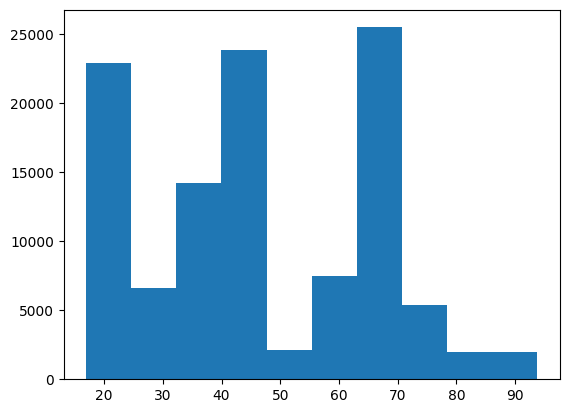

In [49]:

# Crear un histograma de una columna del dataframe
plt.hist(df['revolutions'])


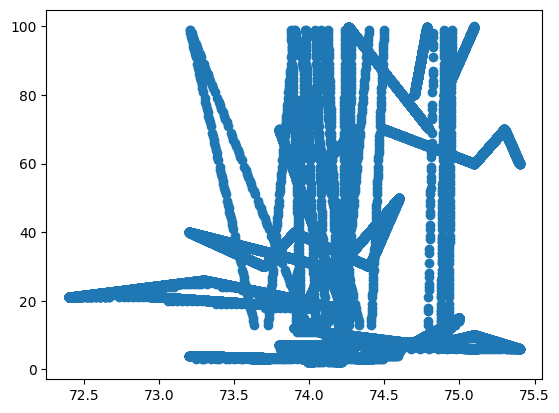

In [50]:

# Crear un scatterplot de dos columnas del dataframe
plt.scatter(df['humidity'], df['vibration'])

In [51]:
# Reemplazar los valores faltantes con la media de la columna
df.fillna(df.mean(), inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    112001 non-null  float64
 4   x1           112001 non-null  float64
 5   x2           112001 non-null  float64
 6   x3           112001 non-null  float64
 7   x4           112001 non-null  float64
 8   x5           112001 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 7.7 MB


In [53]:

# Eliminar las filas con valores faltantes
df.dropna(inplace=True)

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Seleccionar las columnas que corresponden a las variables de entrada (sensores) y la columna objetivo (vibración)
X = df.iloc[:, 1:8] # Seleccionar las columnas de los sensores
y = df.iloc[:, 3] # Seleccionar la columna objetivo (vibración)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Crear una instancia del modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=5)

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 0.5429596781096445


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo de Bosques aleatorios
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = rf.predict(X_test)

# Calcular el error cuadrático medio (MSE) en los datos de prueba
mse = mean_squared_error(y_test, y_pred)

# Imprimir el valor del MSE
print("MSE:", mse)

MSE: 2.975045759940454e-06


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Separar el conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo de regresión lineal
reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
reg.fit(X_train, y_train)

# Predecir los valores de y para los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el MSE y R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

MSE: 7.738851627716978e-24
R²: 1.0


In [68]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached h5py-3.8.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached grpcio-1.54.0-cp310-cp310-win_amd64.whl (4.1 MB)
  Using cached ml_dtypes-0.1.0-cp310-cp310-win_amd64.whl (120 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached requests-2.28.2-py3-none-any.whl (62 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.


[notice] A new release of pip available: 22.2.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
